In [1]:
#imports
import pandas as pd
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset=pd.read_csv("prep_data.csv")

In [3]:
dataset

,employee_id,department,region_number,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,promotion
0,8724,Technology,26,Bachelors,m,sourcing,1,24,0.0,1,1,0,77,No
1,74430,HR,4,Bachelors,f,other,1,31,3.0,5,0,0,51,No
2,72255,Sales & Marketing,13,Bachelors,m,other,1,31,1.0,4,0,0,47,No
3,38562,Procurement,2,Bachelors,f,other,3,31,2.0,9,0,0,65,No
4,64486,Finance,29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,54192,HR,22,Below Secondary,m,other,1,24,2.0,2,0,0,47,No
17410,57239,Sales & Marketing,31,Bachelors,m,other,1,42,3.0,10,0,0,53,No
17411,73858,Sales & Marketing,25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45,No
17412,64573,Technology,7,Bachelors,f,referred,2,30,5.0,6,1,0,81,No


In [4]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtypes=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [5]:
quanQual(dataset)

(['employee_id',
  'region_number',
  'no_of_trainings',
  'age',
  'previous_year_rating',
  'length_of_service',
  'KPIs_met_more_than_80',
  'awards_won',
  'avg_training_score'],
 ['department', 'education', 'gender', 'recruitment_channel', 'promotion'])

In [6]:
quan,qual=quanQual(dataset)

In [7]:
quan

['employee_id',
 'region_number',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met_more_than_80',
 'awards_won',
 'avg_training_score']

In [8]:
qual

['department', 'education', 'gender', 'recruitment_channel', 'promotion']

#1) What kind of relation between rating and employee age?

In [9]:
dataset.corr()

,employee_id,region_number,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
employee_id,1.000000,-0.016325,-0.005753,0.000887,-0.002008,0.010688,0.010230,-0.001287,-0.014612
region_number,-0.016325,1.000000,-0.012788,-0.250584,-0.030001,-0.156571,-0.017285,-0.008726,0.025743
no_of_trainings,-0.005753,-0.012788,1.000000,-0.085722,-0.061815,-0.061190,-0.045036,0.004424,0.045242
age,0.000887,-0.250584,-0.085722,1.000000,0.194496,0.641175,-0.025393,0.003713,-0.028074
previous_year_rating,-0.002008,-0.030001,-0.061815,0.194496,1.000000,0.205387,0.263896,0.027647,0.046657
length_of_service,0.010688,-0.156571,-0.061190,0.641175,0.205387,1.000000,-0.079510,-0.039255,-0.026311
KPIs_met_more_than_80,0.010230,-0.017285,-0.045036,-0.025393,0.263896,-0.079510,1.000000,0.105350,0.071780
awards_won,-0.001287,-0.008726,0.004424,0.003713,0.027647,-0.039255,0.105350,1.000000,0.077706
avg_training_score,-0.014612,0.025743,0.045242,-0.028074,0.046657,-0.026311,0.071780,0.077706,1.000000


Relation between previous year rating and employee age is 0.1944, which is low degree of 
    positive correlation 19% directly proportional.
    
    #Positive correlation

#2) Define IQR range of employees' service period and overall minimum scored marks in training?

In [10]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR","1.5rule","Lesser","Greater",
                                "Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

In [11]:
descriptive

,employee_id,region_number,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
Mean,39080.8,14.2853,1.25078,34.808,3.08378,5.8016,0.358849,0.023372,63.1767
Median,39114,13,1,33,3,5,0,0,60
Mode,3,2,1,30,3,3,0,0,50
Q1:25%,19280.2,4,1,29,2,3,0,0,51
Q2:50%,39114,13,1,33,3,5,0,0,60
Q3:75%,58837.5,22,1,39,4,7,1,0,75
Q4:100%,78295,34,9,60,5,34,1,1,99
IQR,39557.2,18,0,10,2,4,1,0,24
1.5rule,59335.9,27,0,15,3,6,1.5,0,36
Lesser,-40055.6,-23,1,14,-1,-3,-1.5,0,15


IQR of service period is 4 years and overall minimum getting score is 39

#3)Test the analysis of variance between previous_year_rating and avg_training_score at significance level 5% (make decision using hypothesis testing )

In [12]:
#One independent variable
import scipy.stats as stats
stats.f_oneway(dataset['previous_year_rating'],dataset['avg_training_score'])

F_onewayResult(statistic=344902.22171083145, pvalue=0.0)

p value is lesser than 0.05 so rejecting null hypothesis and accepting Alternate hypothesis.
H1- There is significant difference between these columns.
       #Alternate Hypothesis

#3)Test the similarity between department(Finance) and education(Bachelors) 
with respect to avg_training_score at significance level of5% (Make decision using hypothesis testing)

In [13]:
from scipy.stats import ttest_ind

Finance=dataset[dataset['department']=='Finance']['avg_training_score']
Bachelors=dataset[dataset['education']=='Bachelors']['avg_training_score']
ttest_ind(Finance,Bachelors)

Ttest_indResult(statistic=-5.674537655917891, pvalue=1.4219965646490503e-08)

Lesser the statistic value higher the similarity; pvalue should be less than five percentage;
so in this case , salary of both Sci_Tech and Mkt_HR shows high similarity

p value is greater than 0.05 so rejecting alternate hypothesis and accepting null hypothesis 
H0 Null hypothesis
    #H0 - There is no similarity between Finance and Bachelors and also there is significant difference

In [14]:
#4)Convert the normal distribution to standard normal distribution for training score column

In [15]:
def StdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

C:\Users\abina\Anac\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


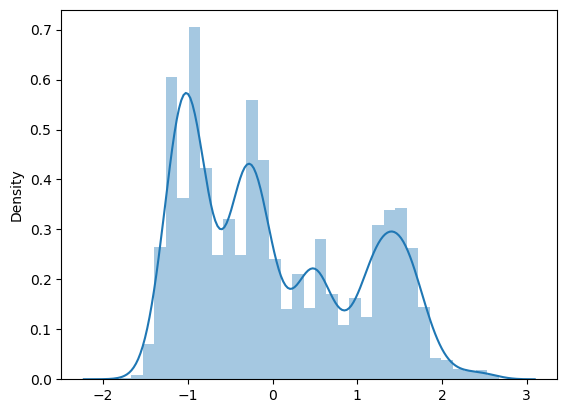

In [16]:
StdNBgraph(dataset['avg_training_score'])

In [17]:
#5)What is the probability Density function of the training score range from 60 to 85?

In [18]:
def get_pdf_prob(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'pink'},color='yellow')
    pyplot.axvline(startrange,color='green')
    pyplot.axvline(endrange,color='green')
    
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('mean=%.3f, standard deviation=%.3f' %(sample_mean,sample_std))
    
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    
    print("The area between range ({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

mean=63.177, standard deviation=13.418
The area between range (65,80):0.34887074226827297


C:\Users\abina\Anac\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.34887074226827297

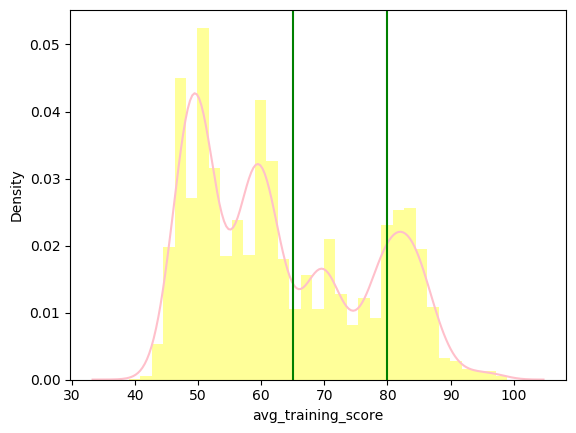

In [19]:
get_pdf_prob(dataset['avg_training_score'],65,80)

In [20]:
#6)which parameter is highly correlated with training score?

In [21]:
dataset.corr()

,employee_id,region_number,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
employee_id,1.000000,-0.016325,-0.005753,0.000887,-0.002008,0.010688,0.010230,-0.001287,-0.014612
region_number,-0.016325,1.000000,-0.012788,-0.250584,-0.030001,-0.156571,-0.017285,-0.008726,0.025743
no_of_trainings,-0.005753,-0.012788,1.000000,-0.085722,-0.061815,-0.061190,-0.045036,0.004424,0.045242
age,0.000887,-0.250584,-0.085722,1.000000,0.194496,0.641175,-0.025393,0.003713,-0.028074
previous_year_rating,-0.002008,-0.030001,-0.061815,0.194496,1.000000,0.205387,0.263896,0.027647,0.046657
length_of_service,0.010688,-0.156571,-0.061190,0.641175,0.205387,1.000000,-0.079510,-0.039255,-0.026311
KPIs_met_more_than_80,0.010230,-0.017285,-0.045036,-0.025393,0.263896,-0.079510,1.000000,0.105350,0.071780
awards_won,-0.001287,-0.008726,0.004424,0.003713,0.027647,-0.039255,0.105350,1.000000,0.077706
avg_training_score,-0.014612,0.025743,0.045242,-0.028074,0.046657,-0.026311,0.071780,0.077706,1.000000


#Awards_won column is highly correlated with training score.

#7)Univariate analysis of training score -Distribution plot

C:\Users\abina\Anac\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


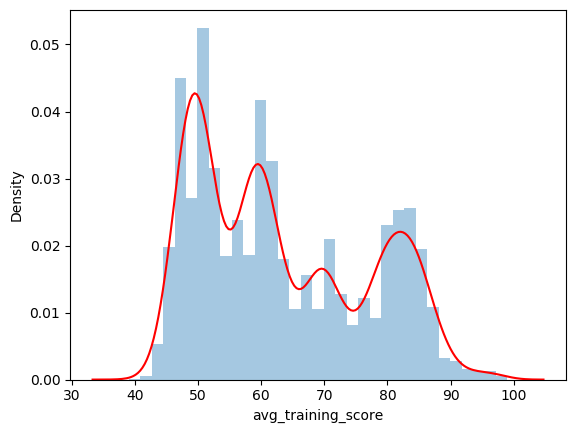

In [22]:
import seaborn as sb
sb.distplot(dataset["avg_training_score"],hist=True, kde=True, kde_kws={'color':'red'})

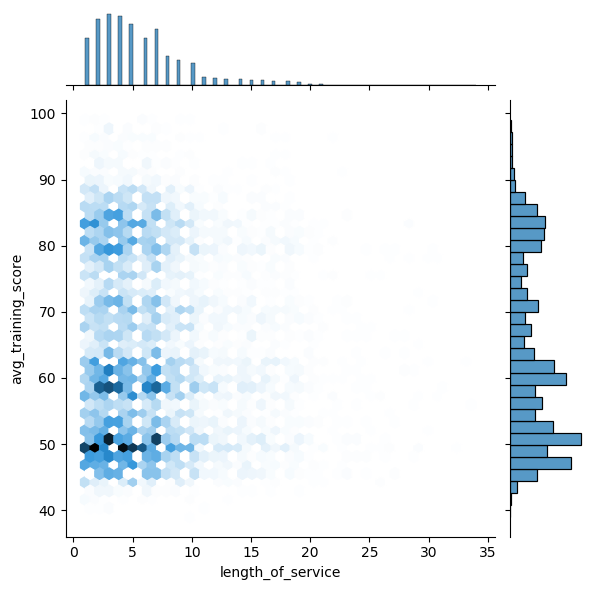

In [23]:
#8)Joint plot of service period and taining score
sb.jointplot(x='length_of_service',y='avg_training_score',data=dataset,kind='hex')
plt.show()

In [24]:
#9) Which gender employees got more marks in training?

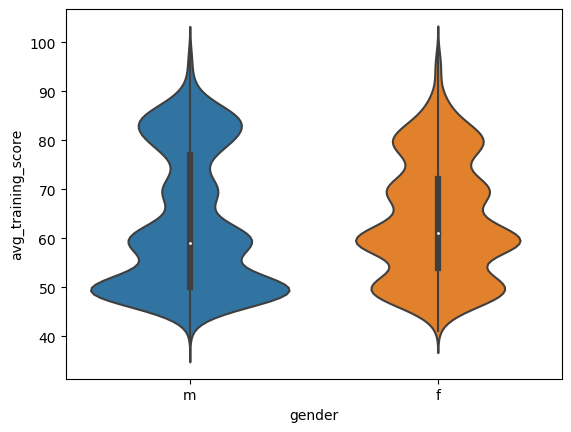

In [25]:
sb.violinplot(x='gender',y='avg_training_score', data=dataset)

In [26]:
#10) Which department employees got more rating in previous year

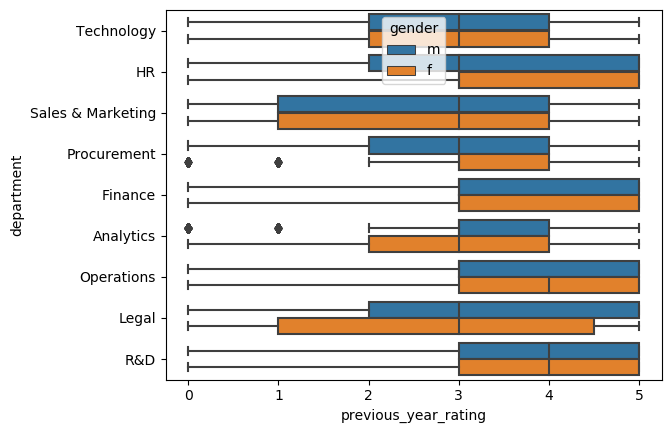

In [27]:
sb.boxplot(x='previous_year_rating',y='department',data=dataset,hue='gender')
plt.show()

In [28]:
#11)Which education count is high in the employees list?

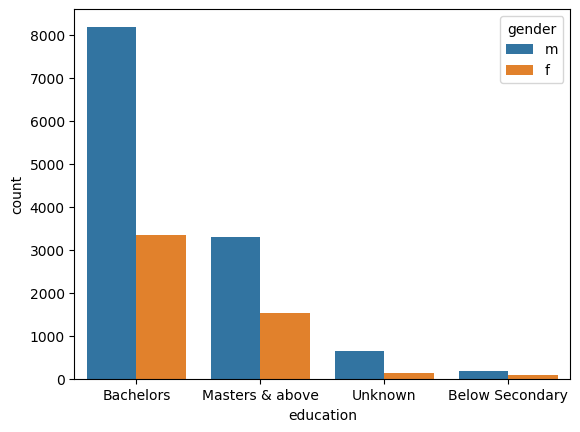

In [29]:
sb.countplot(x='education',data=dataset,hue='gender')
plt.show()

In [30]:
#12) Which gender employees got KPIs more than 80?

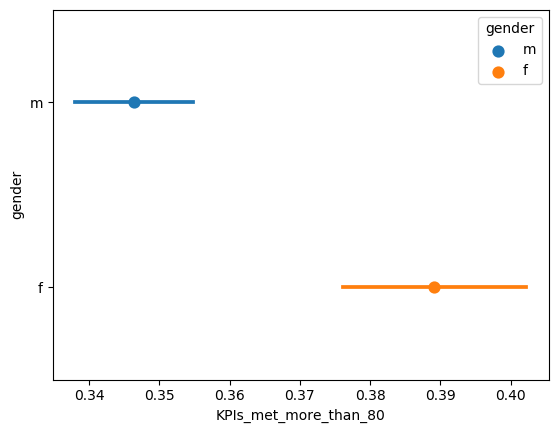

In [31]:
sb.pointplot(x="KPIs_met_more_than_80",y="gender",data=dataset,hue='gender')
plt.show()

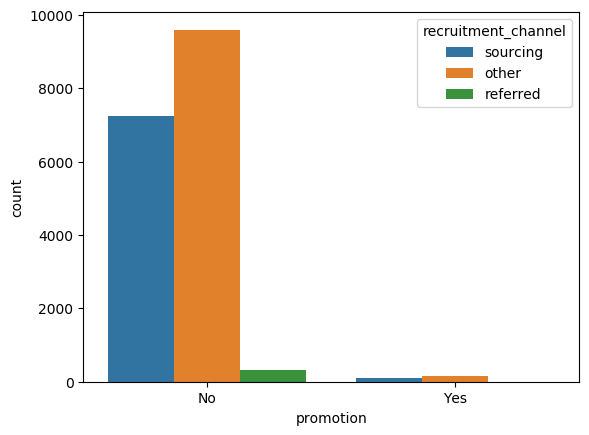

In [32]:
#How many employees got promotion?
sb.countplot(x='promotion',data=dataset,hue='recruitment_channel')
plt.show()